# DNN: analysis with Keras of 2D data

In [3]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib as mpl
mpl.rc('image', cmap='copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15

%run nonlinear_function.py

# training data
perc_train = 0.8

In [4]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

OSError: ./DATA/data-for-DNN-1.dat not found.

### Split training and test data

In [3]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


### Rescale input data

In [4]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

### Define the model with Keras / Tensorflow

In [19]:
# reproducibility
np.random.seed(12345)
import tensorflow.random as tf_r
tf_r.set_seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
# as case 1 but one layer shorter
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
if CASE==10:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(6,activation='sigmoid'))
    model.add(Dense(2,activation='sigmoid'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
if CASE==20:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='linear'))
    model.add(Dense(5,activation='tanh'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 6         
                                                                 
 dense_9 (Dense)             (None, 20)                60        
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dense_11 (Dense)            (None, 20)                420       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 21        
                                                                 
Total params: 927
Trainable params: 927
Non-trainable 

### Optimization method and cost function

In [20]:
model.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

### Training

In [21]:
fit = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.6624 - accuracy: 0.6803 - val_loss: 0.6330 - val_accuracy: 0.6675 - 507ms/epoch - 8ms/step
Epoch 2/400
64/64 - 0s - loss: 0.5999 - accuracy: 0.6916 - val_loss: 0.5941 - val_accuracy: 0.6837 - 86ms/epoch - 1ms/step
Epoch 3/400
64/64 - 0s - loss: 0.5617 - accuracy: 0.7141 - val_loss: 0.5743 - val_accuracy: 0.6963 - 71ms/epoch - 1ms/step
Epoch 4/400
64/64 - 0s - loss: 0.5358 - accuracy: 0.7297 - val_loss: 0.5566 - val_accuracy: 0.7050 - 73ms/epoch - 1ms/step
Epoch 5/400
64/64 - 0s - loss: 0.5105 - accuracy: 0.7459 - val_loss: 0.5350 - val_accuracy: 0.7188 - 67ms/epoch - 1ms/step
Epoch 6/400
64/64 - 0s - loss: 0.4903 - accuracy: 0.7541 - val_loss: 0.5148 - val_accuracy: 0.7287 - 72ms/epoch - 1ms/step
Epoch 7/400
64/64 - 0s - loss: 0.4737 - accuracy: 0.7684 - val_loss: 0.5004 - val_accuracy: 0.7450 - 78ms/epoch - 1ms/step
Epoch 8/400
64/64 - 0s - loss: 0.4657 - accuracy: 0.7731 - val_loss: 0.4865 - val_accuracy: 0.7462 - 77ms/epoch - 1ms/step
Epoch 9/400
64/

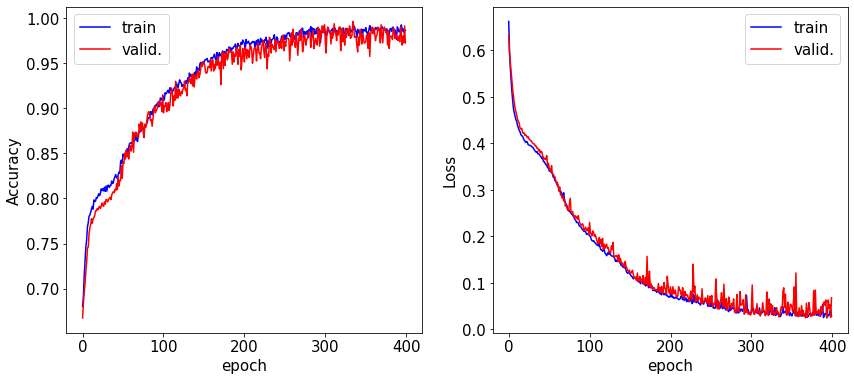

In [22]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [23]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model.predict(grid_r)

51 2601
[50. 50.]


<function matplotlib.pyplot.show(close=None, block=None)>

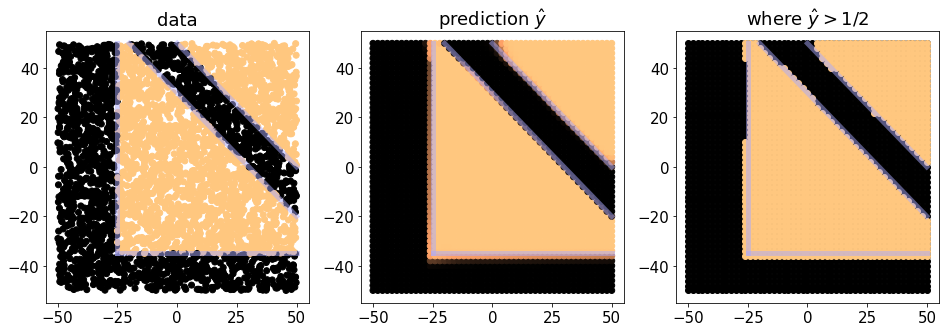

In [24]:
def boundaries():  
    x1=-25
    y1=-35
    c="#AAAAFF"
    a=0.5
    lw=5
    ax.plot((50,-20),(-20,50),c=c,alpha=a,lw=lw)
    ax.plot((50,0),(0,50),c=c,alpha=a,lw=lw)
    ax.plot((x1,50),(y1,y1),c=c,alpha=a,lw=lw)
    ax.plot((x1,x1),(y1,50),c=c,alpha=a,lw=lw)
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax.set_title("data")
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax.set_title("prediction $\\hat y$")
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
boundaries()
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show